In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cancer_predict.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.shape

(569, 32)

In [5]:
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [6]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [7]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
df['diagnosis']= df['diagnosis'].replace({'B':1,'M':0})

In [6]:
df['diagnosis']= df['diagnosis'].target

AttributeError: 'Series' object has no attribute 'target'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
df.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Splitting is a process in which we split data into a group by applying some conditions on datasets. In order to split the data, we apply certain conditions on datasets. In order to split the data, we use groupby() function this function is used to split the data into groups based on some criteria.

In [14]:
X = df.drop(columns=['diagnosis'],axis=1)
y=df['diagnosis']

In [16]:
print(X)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0            0.11840           0.27760         0.30010              

In [22]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [22]:
X.shape,X_train_std.shape,X_test.shape

((569, 31), (455, 31), (114, 31))

Standardize the data

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [40]:
X_train_std

array([[-0.2394432 , -0.01330339,  1.7757658 , ..., -0.13236958,
        -1.08014517, -0.03527943],
       [ 0.47435907, -0.8448276 , -0.6284278 , ..., -1.11552632,
        -0.85773964, -0.72098905],
       [-0.23982301,  1.44755936,  0.71180168, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.23953211, -0.46608541, -1.49375484, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [ 0.48265433, -0.50025764, -1.62161319, ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [-0.17757265,  0.96060511,  1.21181916, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

In [41]:
X_test_std

array([[-0.23949961, -0.04462793, -1.41612656, ..., -0.18278004,
        -1.23064515, -0.6268286 ],
       [-0.2467237 ,  0.24583601, -0.06219797, ...,  0.54129749,
         0.11047691,  0.0483572 ],
       [-0.17438876, -1.26115925, -0.29051645, ..., -1.35138617,
         0.269338  , -0.28231213],
       ...,
       [-0.24002111,  0.72709489,  0.45836817, ...,  1.46701686,
         1.19909344,  0.65319961],
       [-0.2400006 ,  0.25437907,  1.33054477, ..., -1.29043534,
        -2.22561725, -1.59557344],
       [-0.23978737,  0.84100232, -0.06676434, ...,  2.15137705,
         0.35629355,  0.37459546]])

Building the neural network

In [42]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [44]:
model = keras.Sequential([
                            keras.layers.Flatten(input_shape=(31,)),
                            keras.layers.Dense(20,activation='relu'),
                            keras.layers.Dense(2,activation='sigmoid')
])

In [45]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
y_train

560    1
428    1
198    0
203    0
41     0
      ..
299    1
534    1
493    1
527    1
168    0
Name: diagnosis, Length: 455, dtype: int64

In [46]:
history = model.fit(X_train_std,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.3610 - loss: 1.0107 - val_accuracy: 0.3043 - val_loss: 0.9128
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5644 - loss: 0.6964 - val_accuracy: 0.6739 - val_loss: 0.6293
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7616 - loss: 0.5027 - val_accuracy: 0.8261 - val_loss: 0.4591
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8865 - loss: 0.3834 - val_accuracy: 0.9130 - val_loss: 0.3522
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9247 - loss: 0.3062 - val_accuracy: 0.9130 - val_loss: 0.2821
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9363 - loss: 0.2533 - val_accuracy: 0.9130 - val_loss: 0.2347
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9494 - loss: 0.2166 - val_accuracy: 0.9130 - val_loss: 0.2013
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9574 - loss: 0.1901 - val_accuracy: 0.9130 - v

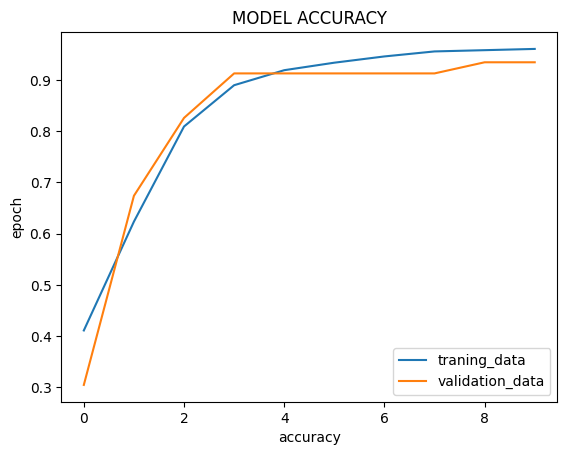

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.xlabel('accuracy')
plt.ylabel('epoch')

plt.legend(['traning_data','validation_data'],loc = 'lower right')


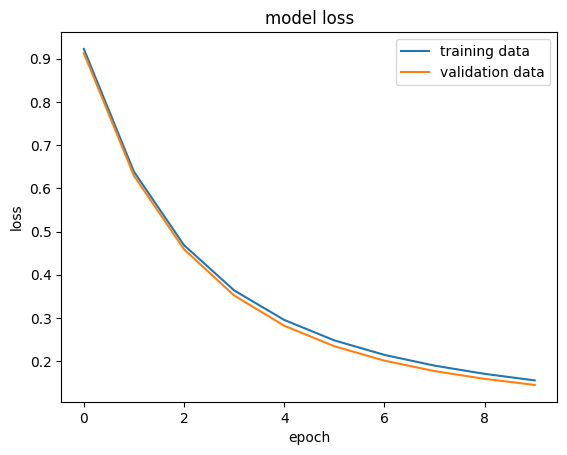

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['training data','validation data'], loc = 'upper right')

Accuracy of model

In [49]:
X_test_std

array([[-0.23949961, -0.04462793, -1.41612656, ..., -0.18278004,
        -1.23064515, -0.6268286 ],
       [-0.2467237 ,  0.24583601, -0.06219797, ...,  0.54129749,
         0.11047691,  0.0483572 ],
       [-0.17438876, -1.26115925, -0.29051645, ..., -1.35138617,
         0.269338  , -0.28231213],
       ...,
       [-0.24002111,  0.72709489,  0.45836817, ...,  1.46701686,
         1.19909344,  0.65319961],
       [-0.2400006 ,  0.25437907,  1.33054477, ..., -1.29043534,
        -2.22561725, -1.59557344],
       [-0.23978737,  0.84100232, -0.06676434, ...,  2.15137705,
         0.35629355,  0.37459546]])

In [50]:
y_test

528    1
291    1
467    1
108    0
340    1
      ..
471    1
449    0
24     0
38     0
230    0
Name: diagnosis, Length: 114, dtype: int64

In [51]:
loss,accuracy = model.evaluate(X_test_std,y_test)
print(accuracy)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9529 - loss: 0.1400 
0.9473684430122375


In [53]:
print(X_test_std.shape)

print(X_test_std[0])


(114, 31)
[-0.23949961 -0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457
 -0.11323672  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124
  2.62763999  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593
  2.88971815 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552
 -0.38767294  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515
 -0.6268286 ]


In [54]:
y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [55]:
y_pred

array([[0.18889186, 0.4064005 ],
       [0.5192493 , 0.56269526],
       [0.10919214, 0.9472536 ],
       [0.9994518 , 0.02958834],
       [0.6032102 , 0.6772444 ],
       [0.98416615, 0.10899577],
       [0.24788539, 0.8130536 ],
       [0.44298482, 0.97286016],
       [0.39417994, 0.89405245],
       [0.5633471 , 0.94691986],
       [0.517995  , 0.5879633 ],
       [0.29986066, 0.81385314],
       [0.0508751 , 0.7167145 ],
       [0.27012968, 0.62451243],
       [0.1591812 , 0.9346647 ],
       [0.7076039 , 0.07548212],
       [0.2680725 , 0.9562964 ],
       [0.27835712, 0.83239084],
       [0.22652152, 0.8998931 ],
       [0.9899158 , 0.43584275],
       [0.3988068 , 0.9917914 ],
       [0.3662593 , 0.95097864],
       [0.56969184, 0.92999375],
       [0.34879538, 0.96372855],
       [0.3780133 , 0.8839426 ],
       [0.8512903 , 0.22239405],
       [0.4431204 , 0.81152296],
       [0.5590352 , 0.7166892 ],
       [0.6627333 , 0.10864192],
       [0.81612366, 0.15159261],
       [0.

In [56]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.18889186 0.4064005 ]


In [57]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


In [65]:
input_data=(842302,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy_array as we are predicting for one value
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#standarizing the input data
input_data_std= scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0]==0):
    print('The tumor is Malignant')
else:
    print('The tumor is Benign')





C:\Users\Lankala Vinay Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[0.9985781  0.31331578]]
[0]
The tumor is Malignant
